# Importing modules

In [667]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_colwidth', -1)
from time import time
import re
import string
import os
import datetime
from pprint import pprint
import collections

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale=1.3)

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib
from sklearn.decomposition import PCA

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
import string,logging,re
import pandas as pd
import gensim
import statsmodels.api as sm
import statsmodels.formula.api as smf
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
from wordcloud import STOPWORDS
import itertools
from sklearn.cluster import KMeans
from sklearn import cluster, datasets
import warnings
warnings.filterwarnings('ignore')

np.random.seed(37)


# Scraping Twitter

In [724]:
import tweepy
from textblob import TextBlob
import csv
import re
import sys
import pandas as pd

consumer_key='WpzI8co73k4ebdMbfVWTnmJDO'
consumer_secret='LjK96y37hgvpz19T3xz0YwU4O40gO0sDktHuTR3divBlTFefdA'

access_token_key='1700216695-cHjJAid5puFuace0UeU88sfcHsdfsqoRU1LBLOG'
access_token_secret='Nb46SODfcDfFvYUndLgGVdPGdGMGJE5WDlzmO6ov46faS'


auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token_key,access_token_secret)

api=tweepy.API(auth,wait_on_rate_limit=True)
unwanted_words=['@','RT',':','https','http']
symbols=['@','#']
data=[]
for tweet in tweepy.Cursor(api.search, q="Hillary Clinton", result_type="recent", include_entities=True, lang="en").items(2000):

    text=tweet.text
    textWords=text.split()
    cleanedTweet=' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(RT)", " ", text).split())

    analysis= TextBlob(cleanedTweet)

    polarity = 'Positive'
    if(analysis.sentiment.polarity < 0):
        polarity = 'Negative'
    if(0<=analysis.sentiment.polarity <=0.2):
        polarity = 'Neutral'

    dic={}
    dic['Sentiment']=polarity
    dic['Score'] = analysis.sentiment.polarity
    dic['Tweet']=cleanedTweet
    data.append(dic)
df=pd.DataFrame(data)
df.to_csv('hillary_score.csv')


# Loading Bernie Tweets

In [433]:
df = pd.read_csv('/Users/rayyi/Documents/MGMT_190/Airline_Sentiment/source/merged_bernie2.csv')
df = df[['Tweet','Score','Sentiment']]
df.head()

,Tweet,Score,Sentiment
0,Movements are propelled by the rhetoric amp actions modeled and perpetuated by their leaders If tha,0.000000,Neutral
1,For the first time ever Action has endorsed in a presidential primary They chose Here s why,0.250000,Positive
2,Then don t sit there and complain on twitter We need Donate now,0.000000,Neutral
3,If America won t elect a woman president yet which seems evident it s up to men to help prepare it for female leadership,0.350000,Positive
4,Bernie Sanders is trying to drum up support from older voters with a new ad featuring RolandMartinUnfilt,0.151515,Neutral


# Bernie Sentiment Count

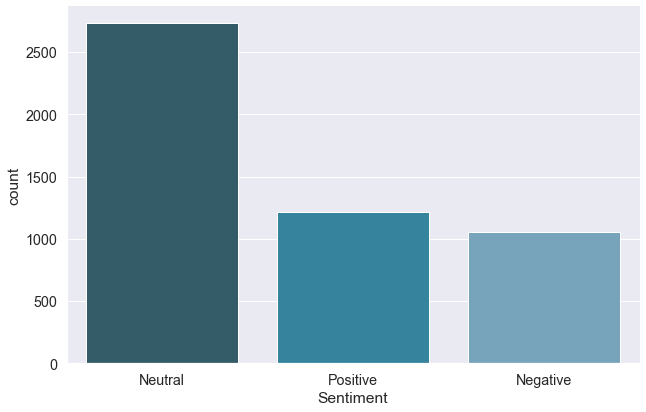

In [258]:
target_dist = sns.factorplot(x = 'Sentiment',data=df, kind="count", size=6, aspect=1.5, palette="PuBuGn_d")
plt.show();

In [259]:
df['Sentiment'].value_counts()

Neutral     2731
Positive    1215
Negative    1054
Name: Sentiment, dtype: int64

# Bernie Sanders Sentiment Score Distribution

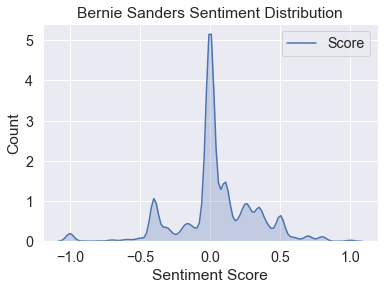

In [260]:
sns.kdeplot(df['Score'], shade=True).set(xlabel='Sentiment Score', ylabel='Count')
plt.title('Bernie Sanders Sentiment Distribution')
plt.show()

In [261]:
import nltk
# nltk.download('stopwords')
tweet_list = []
for i in df["Tweet"]:
    if type(i) != float:
        tweet_list.append(i)

cached_stop_words = stopwords.words("english")
cached_stop_words.extend(["like","bernie","sanders","says","support","vote","media",
                          "said","debate","must","know","would","make"])
word_list = []

for tweet in tweet_list:
    for word in tweet.split():
        word = re.sub('^u\'','',word)
        word = re.sub('\'','',word)
        word = word.lower()
        if len(word) > 3:
            if str(word) not in cached_stop_words:
                word_list.append(word)


In [262]:
word_freq = {}
for word in word_list:
    if word in word_freq.keys():
        word_freq[word] = word_freq[word] + 1
    else:
        word_freq[word] = 1
#Top 10 words for Bernie
sorted_word_freq = list(sorted(word_freq.items(), key=lambda kv: (kv[1], kv[0]), reverse=True))
top_ten = []
print("Top 20 words for Bernie:")
for i in range(20):
    top_ten.append(sorted_word_freq[i])
    print(sorted_word_freq[i])


Top 20 words for Bernie:
('biden', 1254)
('guess', 713)
('labor', 644)
('nazi', 527)
('rally', 477)
('warren', 455)
('made', 443)
('supporters', 438)
('flag', 400)
('united', 391)
('shows', 384)
('believe', 374)
('receiving', 356)
('protection', 356)
('service', 355)
('secret', 355)
('armed', 355)
('president', 351)
('policy', 334)
('reason', 329)


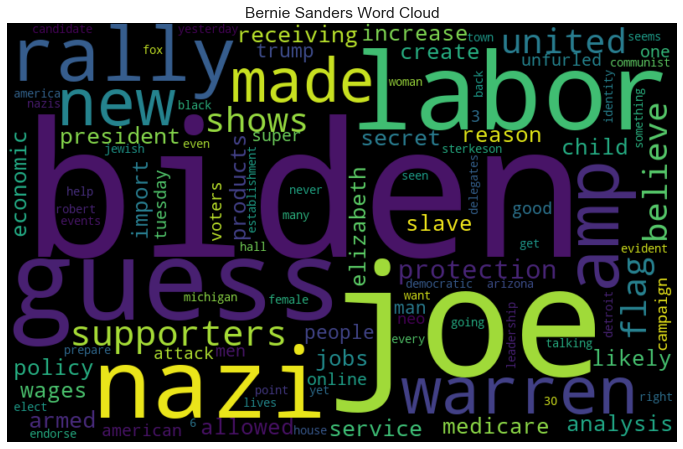

In [634]:
data = []
for i in df.Tweet:
    if type(i) != float:
        data.append({'Tweet':i})
df2 = pd.DataFrame(data)

def gen_freq(text):
    
    word_list = []
    
    for tw_words in text.split():
        word_list.extend(tw_words)
    
    word_freq = pd.Series(word_list).value_counts()
    
    word_freq[:20]
    
    return word_freq

gen_freq(df2.Tweet.str)

import re
from wordcloud import STOPWORDS

def clean_text(text):
    text = re.sub(r'RT', '', text)
    
    text = re.sub(r'&amp;', '&', text)
    
    text = re.sub(r'[?!.;:,#@-]', '', text)
    
    text = text.lower()
    
    return text

cached_stop_words = stopwords.words("english")
cached_stop_words.extend(["like","bernie","sanders","says","support","vote","media","said","debate","must","know","would","make"])
text = df2.Tweet.apply(lambda x: clean_text(x))
word_freq = gen_freq(text.str)*100
word_freq = word_freq.drop(labels=cached_stop_words, errors='ignore')

wc = WordCloud(width=800, height=500, max_words=100, background_color='black').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Bernie Sanders Word Cloud')
plt.show()
# from wordcloud import WordCloud
# wc = WordCloud(width=1000, height=330, max_words=100, background_color='black').generate_from_frequencies(sorted_word_freq)

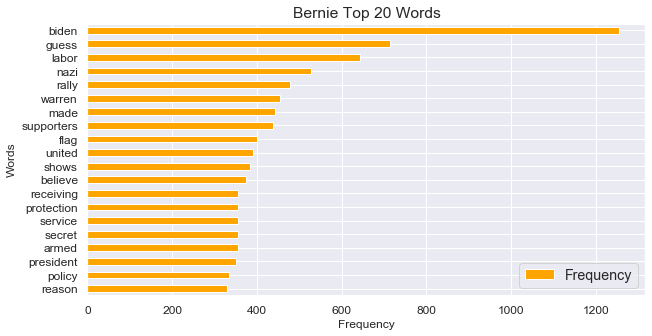

In [264]:
df = pd.DataFrame(top_ten)
df[1] = pd.to_numeric(df[1])
df.columns = ["Words","Frequency"]
df.index = df.Words
df = df.sort_values(by='Frequency', ascending=1)
top_10 = df[['Words','Frequency']].plot(kind='barh', title ="Bernie Top 20 Words",figsize=(10,5),legend=True, fontsize=12,color='orange')
top_10.set_xlabel("Frequency",fontsize=12)
top_10.set_ylabel("Words",fontsize=12)
plt.show()

In [635]:
txt = list(text)
word_tokens = []
filtered_sentence = []
tokenized_tweets=[]

for i in txt:
    word_tokens.append(word_tokenize(i))
for i in word_tokens:
    wr=[]
    for word in i:
        if word not in cached_stop_words:
            wr.append(word)
        tokenized_tweets.append(wr)
tokenized_tweets1 = list(tokenized_tweets for tokenized_tweets,_ in itertools.groupby(tokenized_tweets))

In [636]:
tag_tokenized=[gensim.models.doc2vec.TaggedDocument(tokenized_tweets1[i],[i]) for i in range(len(tokenized_tweets1))]
model = gensim.models.doc2vec.Doc2Vec(size=15, min_count=3, iter=15)
model.build_vocab(tag_tokenized)
model.train(tag_tokenized, total_examples=model.corpus_count, epochs=model.iter)

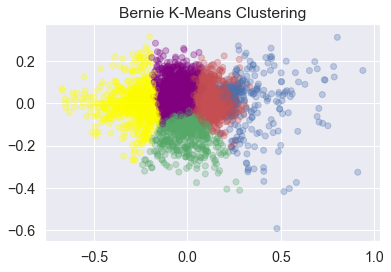

In [645]:
vec = pd.DataFrame(model.docvecs.vectors_docs)
columns1 = []
for i in range(1,len(vec.columns)+1):
    columns1.append('PC'+str(i))
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(vec),columns = columns1,index=vec.index)

fig, ax = plt.subplots()
X = df_plot[df_plot.columns]
kmeans = cluster.KMeans(n_clusters=5)
clabels = kmeans.fit_predict(X) 
colors = ['r','b','g','yellow','purple']
plt.title('Bernie K-Means Clustering')
plt.scatter(df_plot.PC1, -df_plot.PC2, color=[colors[l_] for l_ in clabels], alpha = 0.3)
plt.show()

In [646]:
num_clusters = 5
km = KMeans(n_clusters=num_clusters)
km.fit(model.docvecs.vectors_docs)
clusters = km.labels_.tolist()

In [648]:
cluster = pd.Series(clusters)
df_clusters=pd.concat([cluster,df],axis=1)
df_clusters = df_clusters.rename(columns={0: "Cluster"}).dropna()
df_clusters.head()

,Cluster,Tweet,Score,Sentiment
0,0.0,Movements are propelled by the rhetoric amp actions modeled and perpetuated by their leaders If tha,0.000000,Neutral
1,4.0,For the first time ever Action has endorsed in a presidential primary They chose Here s why,0.250000,Positive
2,4.0,Then don t sit there and complain on twitter We need Donate now,0.000000,Neutral
3,2.0,If America won t elect a woman president yet which seems evident it s up to men to help prepare it for female leadership,0.350000,Positive
4,2.0,Bernie Sanders is trying to drum up support from older voters with a new ad featuring RolandMartinUnfilt,0.151515,Neutral


In [665]:
df_clusters[df_clusters.Cluster==3].head()

,Cluster,Tweet,Score,Sentiment
14,3,Earlier today Robert Sterkeson the no Nazi who unfurled a swastika flag at a Bernie Sanders rally was in control of the,0.000000,Neutral
24,3,Last night a Nazi unfurled a swastika against a Jewish candidate for president Please never ever ever again lecture,0.000000,Neutral
40,3,The man who unfurled a Nazi flag at the Bernie Sanders rally in Arizona yesterday is Robert Sterkeson a neo Nazi who lives,0.000000,Neutral
44,3,Earlier today Robert Sterkeson the no Nazi who unfurled a swastika flag at a Bernie Sanders rally had thousands of subsc,0.000000,Neutral
57,3,In the past 24 hours Nazis threatened Bernie Sanders with a swastika at his rally and a rich white Biden surrogate patro,0.041667,Neutral


## Load Joe Biden Tweets

In [265]:
df1 = pd.read_csv('/Users/rayyi/Documents/MGMT_190/Airline_Sentiment/source/merged_biden.csv')
df1 = df1[['Tweet','Score','Sentiment']]
df1

,Tweet,Score,Sentiment
0,Guess who will be receiving armed secret service protection Joe Biden amp Bernie Sanders Guess who doesn t believe you,-0.400000,Negative
1,Why can politicians just lie Do people not care about the track record of the people they vote for Joe Biden was pro,0.000000,Neutral
2,Wait is Joe Biden now leading in the national polls because nobody believed in him see how dumb this is,-0.375000,Negative
3,Say it with me JOE BIDEN IS NOT OBAMA VoteForBernie Bernie2020,0.000000,Neutral
4,It s so damn gross Joe Biden is the modern architect of mass incarceration I need you to see this 1 Listen as he,0.100000,Neutral
...,...,...,...
4995,When legislation came up some years ago determining whether our gay brothers and sisters could be open about their sexua,0.208333,Positive
4996,Joe Biden voted for NAFTA He voted for PNTR with China That is not the kind of record that will defeat Trump Join us,0.600000,Positive
4997,Guess who will be receiving armed secret service protection Joe Biden amp Bernie Sanders Guess who doesn t believe you,-0.400000,Negative
4998,President says he was ready to face communist Bernie Sanders and then Joe Biden won on Super Tuesday,0.266667,Positive


# Joe Biden Sentiment Count

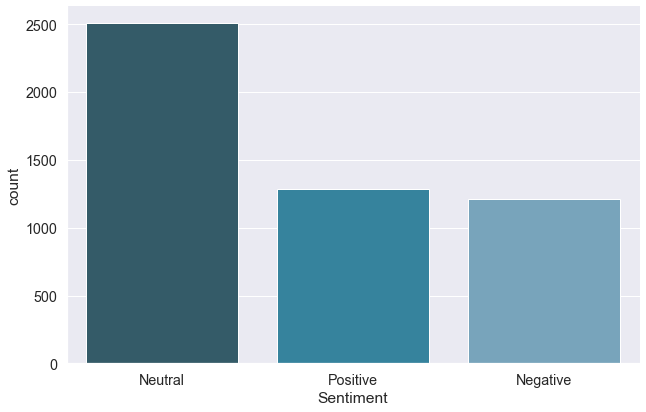

In [436]:
target_dist = sns.factorplot(x = 'Sentiment',data=df1, kind="count", size=6, aspect=1.5, palette="PuBuGn_d",order=["Neutral", "Positive", "Negative"])
plt.show();

In [267]:
df1['Sentiment'].value_counts()

Neutral     2506
Positive    1285
Negative    1209
Name: Sentiment, dtype: int64

# Joe Biden Sentiment Score Distribution

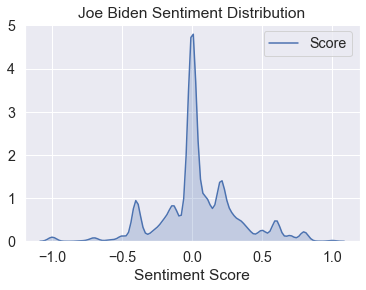

In [268]:
# sns.distplot(df1['Score'], kde=False, rug=True);
sns.kdeplot(df1['Score'], shade=True).set(xlabel='Sentiment Score')
plt.title('Joe Biden Sentiment Distribution')
plt.show()

# Joe Biden Text Analysis

In [626]:
import nltk
# nltk.download('stopwords')
tweet_list = []
for i in df1["Tweet"]:
    tweet_list.append(i)

cached_stop_words = stopwords.words("english")
cached_stop_words.extend(["like","joe","biden","says","support","vote","media","said","debate","must","know","would","make"])
word_list = []
for tweet in tweet_list:
    for word in tweet.split():
        word = re.sub('^u\'','',word)
        word = re.sub('\'','',word)
        word = word.lower()
        if len(word) > 3:
            if str(word) not in cached_stop_words:
                word_list.append(word)

word_freq = {}
for word in word_list:
    if word in word_freq.keys():
        word_freq[word] = word_freq[word] + 1
    else:
        word_freq[word] = 1
sorted_word_freq = list(sorted(word_freq.items(), key=lambda kv: (kv[1], kv[0]), reverse=True))
top_ten = []
print("Top 20 words for Biden:")
for i in range(20):
    top_ten.append(sorted_word_freq[i])
    print(sorted_word_freq[i])


Top 20 words for Biden:
('bernie', 790)
('sanders', 709)
('guess', 642)
('want', 464)
('years', 445)
('trump', 431)
('beto', 430)
('rourke', 421)
('voted', 403)
('everyone', 390)
('take', 388)
('president', 386)
('message', 372)
('believe', 361)
('swing', 359)
('service', 333)
('secret', 333)
('protection', 323)
('receiving', 322)
('armed', 320)


In [629]:
def gen_freq(text):
    
    word_list = []
    
    for tw_words in text.split():
        word_list.extend(tw_words)
    
    word_freq = pd.Series(word_list).value_counts()
    
    word_freq[:20]
    
    return word_freq


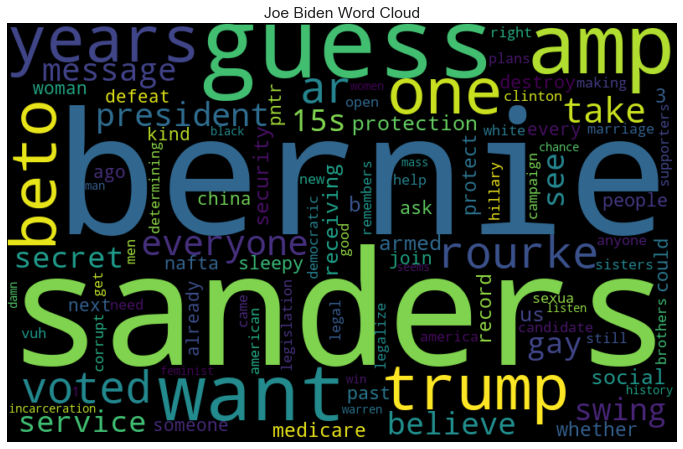

In [631]:
def clean_text(text):
    text = re.sub(r'RT', '', text)
    
    text = re.sub(r'&amp;', '&', text)
    
    text = re.sub(r'[?!.;:,#@-]', '', text)
    
    text = text.lower()
    
    return text

cached_stop_words = stopwords.words("english")
cached_stop_words.extend(["like","joe","biden","says","support","vote","media","said","debate","must","know","would","make"])
text = df1.Tweet.apply(lambda x: clean_text(x))
word_freq = gen_freq(text.str)*100
word_freq = word_freq.drop(labels=cached_stop_words, errors='ignore')

wc = WordCloud(width=800, height=500, max_words=100, background_color='black').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Joe Biden Word Cloud')
plt.show()


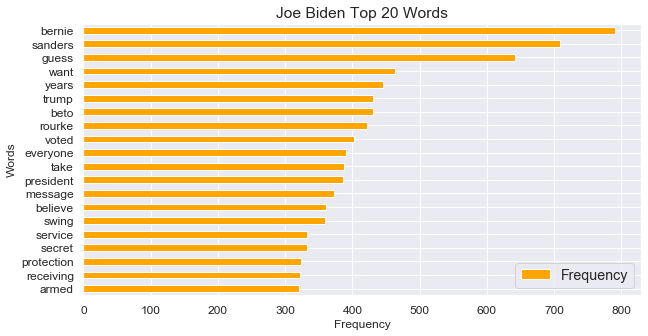

In [632]:
df_words = pd.DataFrame(top_ten)
df_words[1] = pd.to_numeric(df_words[1])
df_words.columns = ["Words","Frequency"]
df_words.index = df_words.Words
df_words = df_words.sort_values(by='Frequency', ascending=1)
top_10 = df_words[['Words','Frequency']].plot(kind='barh', title ="Joe Biden Top 20 Words",figsize=(10,5),legend=True, fontsize=12,color='orange')
top_10.set_xlabel("Frequency",fontsize=12)
top_10.set_ylabel("Words",fontsize=12)
plt.show()

# Joe Biden K-Means Clustering

In [344]:
# nltk.download('punkt')
txt = list(text)
word_tokens = []
filtered_sentence = []
tokenized_tweets=[]

for i in txt:
    word_tokens.append(word_tokenize(i))
for i in word_tokens:
    wr=[]
    for word in i:
        if word not in cached_stop_words:
            wr.append(word)
        tokenized_tweets.append(wr)
tokenized_tweets1 = list(tokenized_tweets for tokenized_tweets,_ in itertools.groupby(tokenized_tweets))


4901

In [445]:
tokenized_tweets1[0]

['guess',
 'receiving',
 'armed',
 'secret',
 'service',
 'protection',
 'amp',
 'bernie',
 'sanders',
 'guess',
 'believe']

In [505]:
tag_tokenized=[gensim.models.doc2vec.TaggedDocument(tokenized_tweets1[i],[i]) for i in range(len(tokenized_tweets1))]

model = gensim.models.doc2vec.Doc2Vec(size=15, min_count=3, iter=15)
model.build_vocab(tag_tokenized)
model.train(tag_tokenized, total_examples=model.corpus_count, epochs=model.iter)


In [512]:
vec = pd.DataFrame(model.docvecs.vectors_docs)
vec.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.014217,-0.004385,-0.012059,0.020467,-0.007479,-0.011282,0.024656,0.049119,-0.035739,0.039063,-0.046154,-0.013884,0.025233,0.029120,-0.074830
1,-0.082805,0.157374,-0.026675,0.024580,0.021647,0.057340,0.099399,0.040502,0.152938,0.164425,-0.054698,-0.053790,-0.004179,0.058654,0.090521
2,-0.198532,0.019083,-0.047761,-0.080809,-0.034223,0.042037,0.046537,0.233614,0.078712,-0.028653,-0.263288,0.014517,-0.078724,0.164117,0.201442
3,-0.128649,-0.021370,0.025490,-0.057029,-0.027873,0.061571,-0.023852,0.225325,0.090208,-0.001138,-0.132745,0.043502,-0.033586,0.060736,0.122763
4,-0.054410,-0.006503,-0.024945,0.028570,-0.122002,-0.027442,0.051737,0.076123,0.045954,0.024827,-0.087336,0.012046,-0.090370,0.101491,0.173381


In [578]:
columns1 = []
for i in range(1,len(vec.columns)+1):
    columns1.append('PC'+str(i))
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(vec),columns = columns1,index=vec.index)
df_plot.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-0.209519,-0.085719,0.008030,0.036086,0.062885,-0.023145,0.003069,0.007211,0.006987,0.023104,-0.018768,0.033834,-0.006642,0.018310,-0.005108
1,-0.060427,-0.017332,0.035175,-0.139835,-0.051776,-0.079597,-0.079502,0.172397,-0.020488,0.092537,-0.012279,0.029661,0.071612,-0.060789,0.040081
2,0.263974,0.079383,0.002967,0.031319,0.079317,-0.056044,-0.073351,0.001796,-0.029242,0.025025,0.001813,-0.025929,0.016383,-0.023030,-0.016976
3,0.118028,0.034978,-0.045221,0.008687,0.010194,0.053994,0.018973,-0.006282,0.009546,0.011839,-0.016958,0.013158,0.009917,-0.034216,-0.033595
4,-0.004297,0.035650,-0.003925,0.044831,-0.058132,-0.133558,-0.051981,-0.043912,-0.000942,0.034487,0.060421,0.005585,0.035770,-0.073899,-0.051277


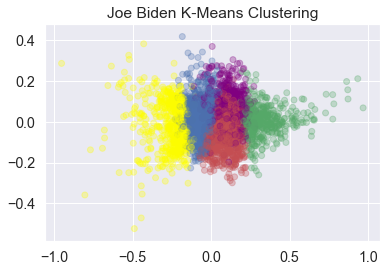

In [624]:
fig, ax = plt.subplots()
X = df_plot[df_plot.columns]
kmeans = cluster.KMeans(n_clusters=5)
clabels = kmeans.fit_predict(X) 
colors = ['r','b','g','yellow','purple']
plt.title('Joe Biden K-Means Clustering')
plt.scatter(df_plot.PC1, -df_plot.PC2, color=[colors[l_] for l_ in clabels], alpha = 0.3)
plt.show()


In [715]:
num_clusters = 5
km = KMeans(n_clusters=num_clusters)
km.fit(model.docvecs.vectors_docs)
clusters = km.labels_.tolist()


In [716]:
clusters[0:5]

[4, 0, 0, 1, 1]

In [718]:
cluster = pd.Series(clusters)
df_clusters=pd.concat([cluster,df1],axis=1)
df_clusters = df_clusters.rename(columns={0: "Cluster"}).dropna()
df_clusters.head()


,Cluster,Tweet,Score,Sentiment
0,4.0,Guess who will be receiving armed secret service protection Joe Biden amp Bernie Sanders Guess who doesn t believe you,-0.400,Negative
1,0.0,Why can politicians just lie Do people not care about the track record of the people they vote for Joe Biden was pro,0.000,Neutral
2,0.0,Wait is Joe Biden now leading in the national polls because nobody believed in him see how dumb this is,-0.375,Negative
3,1.0,Say it with me JOE BIDEN IS NOT OBAMA VoteForBernie Bernie2020,0.000,Neutral
4,1.0,It s so damn gross Joe Biden is the modern architect of mass incarceration I need you to see this 1 Listen as he,0.100,Neutral


In [458]:
df_clusters[df_clusters.Cluster==0].head() #

,Cluster,Tweet,Score,Sentiment
4834,0,When legislation came up some years ago determining whether our gay brothers and sisters could be open about their sexua,0.208333,Positive
4907,0,Joe Biden says if he s elected president he will keep Nancy Pelosi as speaker of the house The biggest problem with that is,0.000000,Neutral
4990,0,How many times have the MSM s experts demanded Trump undergo psyche evaluations How many times have they done the same,0.333333,Positive
4995,0,When legislation came up some years ago determining whether our gay brothers and sisters could be open about their sexua,0.208333,Positive
4996,0,Joe Biden voted for NAFTA He voted for PNTR with China That is not the kind of record that will defeat Trump Join us,0.600000,Positive


In [503]:
df_clusters[df_clusters.Cluster==4].head()

,Cluster,Tweet,Score,Sentiment
28,4,I met young women in Honduras who have been kidnapped people whose family members have been assassinated because of the,0.100000,Neutral
160,4,The Democrat Primary began with 6 minorities 5 women 3 millennials 1 openly gay man And Democrat voters rejec,0.408333,Positive
301,4,Bernie Bros are mean online Cool Joe Biden is a racist who sexually assaults women So idk maybe get out of your,0.179167,Neutral
429,4,are we pretending today that joe biden cares about women N O W is literal terf nonsense,0.000000,Neutral
457,4,NEW VIDEO Over the last 45 years Bernie Sanders has been a strong ally in the fight for women s reproductive rights,0.189899,Neutral


# Trump Data

In [701]:
df3 = pd.read_csv('/Users/rayyi/Documents/MGMT_190/Airline_Sentiment/source/trump_score.csv')
df3 = df[['Tweet','Score','Sentiment']]
df3.drop_duplicates(subset ="Tweet", 
                     keep = False, inplace = True) 
df3.head()

,Tweet,Score,Sentiment
3,Donald Trump and Coronavirus are inexorably linked because of your inept and negligent handling of this crisis That s yo,0.00,Neutral
6,The tweet was removed but it stated donald trump was charging more than 4 times the cost to keep his family safe T,0.50,Positive
14,I m doing an essay on debuncking bullshit I decided to do it on Donald Trump Jr stating that democrats want coron,0.00,Neutral
15,President Trump has given his complete and total endorsement to ex college football coach Tommy Tuberville who is se,0.05,Neutral
18,You spelled Donald J Trump wrong,-0.50,Negative


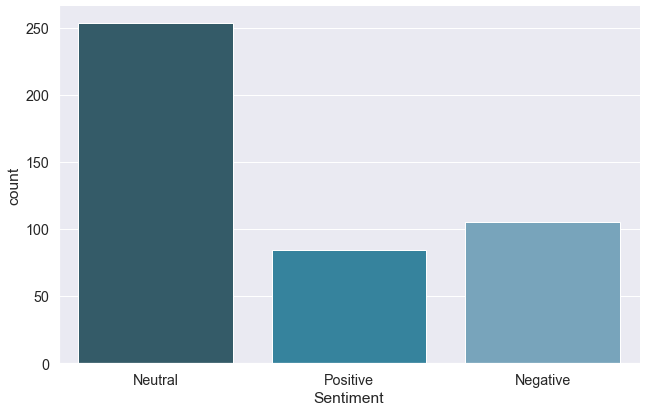

In [702]:
target_dist = sns.factorplot(x = 'Sentiment',data=df3, kind="count", size=6, aspect=1.5, palette="PuBuGn_d",order=["Neutral", "Positive", "Negative"])
plt.show();

In [736]:
tweet_list = []
for i in df3["Tweet"]:
    tweet_list.append(i)

cached_stop_words = stopwords.words("english")
cached_stop_words.extend(["like","donald","trump","says","support","vote","media",\
                          "said","debate","must","know","would","make","america",
                         "election","campaign"])
word_list = []
for tweet in tweet_list:
    for word in tweet.split():
        word = re.sub('^u\'','',word)
        word = re.sub('\'','',word)
        word = word.lower()
        if len(word) > 3:
            if str(word) not in cached_stop_words:
                word_list.append(word)

word_freq = {}
for word in word_list:
    if word in word_freq.keys():
        word_freq[word] = word_freq[word] + 1
    else:
        word_freq[word] = 1
sorted_word_freq = list(sorted(word_freq.items(), key=lambda kv: (kv[1], kv[0]), reverse=True))
top_ten = []
for i in range(20):
    top_ten.append(sorted_word_freq[i])

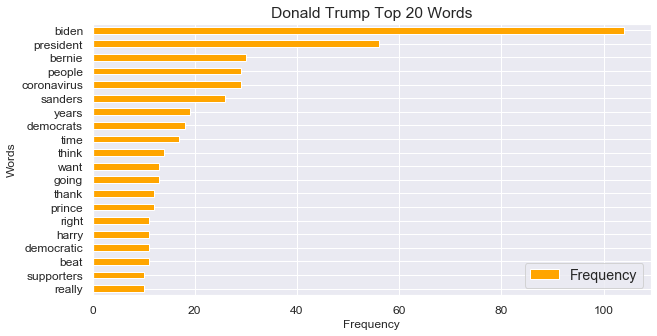

In [737]:
df_words = pd.DataFrame(top_ten)
df_words[1] = pd.to_numeric(df_words[1])
df_words.columns = ["Words","Frequency"]
df_words.index = df_words.Words
df_words = df_words.sort_values(by='Frequency', ascending=1)
top_10 = df_words[['Words','Frequency']].plot(kind='barh', title ="Donald Trump Top 20 Words",figsize=(10,5),legend=True, fontsize=12,color='orange')
top_10.set_xlabel("Frequency",fontsize=12)
top_10.set_ylabel("Words",fontsize=12)
plt.show()

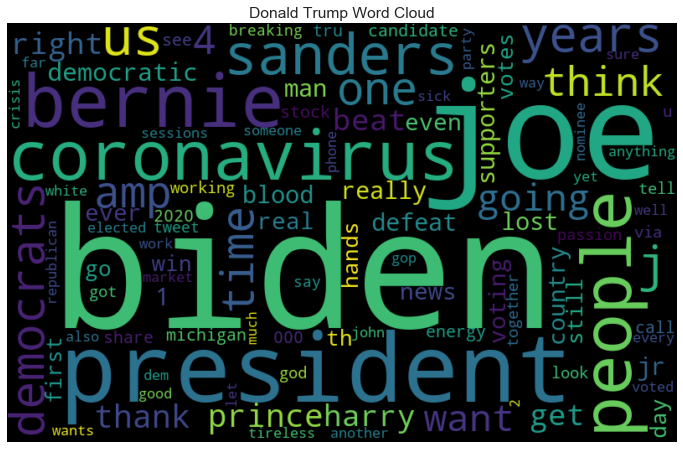

In [720]:
text = df3.Tweet.apply(lambda x: clean_text(x))
word_freq = gen_freq(text.str)*100
word_freq = word_freq.drop(labels=cached_stop_words, errors='ignore')

wc = WordCloud(width=800, height=500, max_words=100, background_color='black').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Donald Trump Word Cloud')
plt.show()

# Hillary Data

In [727]:
df4 = pd.read_csv('/Users/rayyi/Documents/MGMT_190/Airline_Sentiment/source/hillary_score.csv')
df4 = df[['Tweet','Score','Sentiment']]
df4.drop_duplicates(subset ="Tweet", 
                     keep = False, inplace = True) 
df4.head()

,Tweet,Score,Sentiment
3,hillary clinton was a mass murderer and all of her supporters are shitty people,0.000000,Neutral
19,her baggage mattered Clinton fatigue she didn t even go to certain states because she got cocky and to,0.007143,Neutral
20,FYI Hillary Clinton delivered the keynote address at the meeting of the Group of Friends of Women i,0.000000,Neutral
27,But Hillary Goddamn Rodham Clinton beat the shit out of Bernie She won the popular vote Stop staring at your na,0.200000,Neutral
32,I think everyone has figured out the plan Hillary as VP and 6 mos to 1 yr Biden can t continue and Hilla,0.000000,Neutral


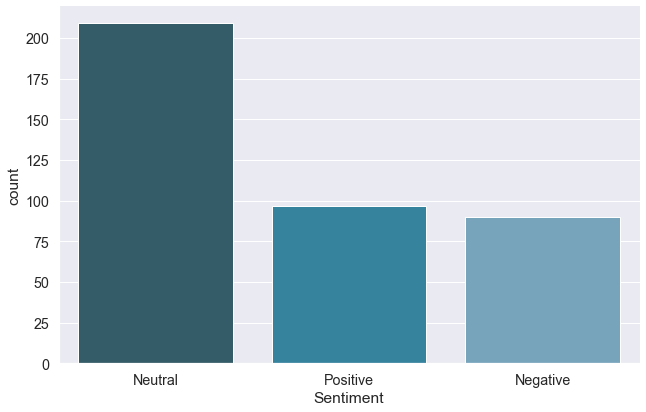

In [728]:
target_dist = sns.factorplot(x = 'Sentiment',data=df4, kind="count", size=6, aspect=1.5, palette="PuBuGn_d",order=["Neutral", "Positive", "Negative"])
plt.show();

In [738]:
tweet_list = []
for i in df4["Tweet"]:
    tweet_list.append(i)

cached_stop_words = stopwords.words("english")
cached_stop_words.extend(["like","hillary","clinton","says","support","vote","media",\
                          "said","debate","must","know","would","make","america",
                         "election","campaign"])
word_list = []
for tweet in tweet_list:
    for word in tweet.split():
        word = re.sub('^u\'','',word)
        word = re.sub('\'','',word)
        word = word.lower()
        if len(word) > 3:
            if str(word) not in cached_stop_words:
                word_list.append(word)

word_freq = {}
for word in word_list:
    if word in word_freq.keys():
        word_freq[word] = word_freq[word] + 1
    else:
        word_freq[word] = 1
sorted_word_freq = list(sorted(word_freq.items(), key=lambda kv: (kv[1], kv[0]), reverse=True))
top_ten = []
for i in range(20):
    top_ten.append(sorted_word_freq[i])

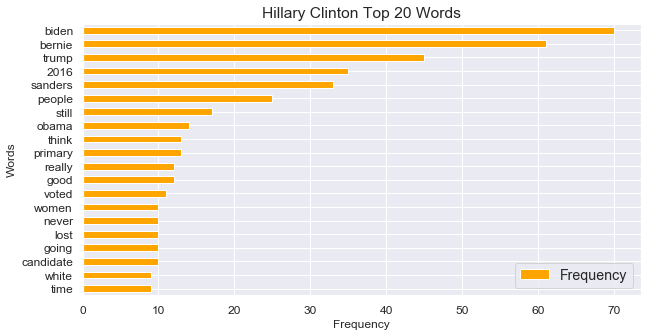

In [739]:
df_words = pd.DataFrame(top_ten)
df_words[1] = pd.to_numeric(df_words[1])
df_words.columns = ["Words","Frequency"]
df_words.index = df_words.Words
df_words = df_words.sort_values(by='Frequency', ascending=1)
top_10 = df_words[['Words','Frequency']].plot(kind='barh', title ="Hillary Clinton Top 20 Words",figsize=(10,5),legend=True, fontsize=12,color='orange')
top_10.set_xlabel("Frequency",fontsize=12)
top_10.set_ylabel("Words",fontsize=12)
plt.show()

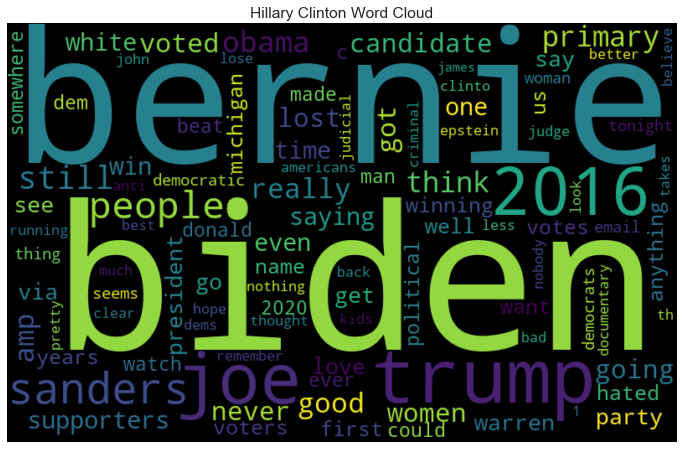

In [735]:
text = df4.Tweet.apply(lambda x: clean_text(x))
word_freq = gen_freq(text.str)*100
word_freq = word_freq.drop(labels=cached_stop_words, errors='ignore')

wc = WordCloud(width=800, height=500, max_words=100, background_color='black').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Hillary Clinton Word Cloud')
plt.show()